### pipeline steps
- read audio and textgrid files
- convert to annotated vectors 
- add start and end tokens

### Features 
- for each audio file each timestep
    - create create a set of features
    - mel spectrogram
    - pitch
    - energy
    - others


### Data
- the shape of the data is (51, 128,2)
- The data has 51 arrays, each corresponding to an audio file
    - Each of the audio files has 128 mel spectrogram features and a Y variable
        - a mel spectrogram feature is 109 dimensional .. other features can be added (mfcc, rmse, ..)
        - the Y variable tells whether a part is stressed (I) or not (O)
     
### Model
- train seq labelling models
    - crf : create new feature functions
    - RNN (GRU): data? -> overfit?
    - MEMM how?

In [139]:
import numpy as np
import librosa
import keras
from os import path
from glob import glob
from textgrid import TextGrid
from textgrid import Interval
import librosa.display
import matplotlib.pyplot as plt
data_folder = "../../Prosody-Pragmatics/Corpus/AA"

In [3]:
audio_files = glob(path.join(data_folder,"*.wav"))
print(len(audio_files))

51


In [182]:
all_data = []

for file in audio_files:
    print(file)
    text_grid_file = ".".join([file.split(".wav")[0], "TextGrid"])
    print(text_grid_file)
    tg = TextGrid().fromFile(text_grid_file)
    y, sr = librosa.load(file)
    
    ## spectrogram features
    S = librosa.feature.melspectrogram(sr = sr, y = y)
    ## time duration
    time_duration = librosa.core.samples_to_time(range(0,y.shape[0],), sr = sr)
    spec_times = librosa.core.samples_to_time( np.arange(0, y.shape[0], int(y.shape[0]/S.shape[0]) + 1), sr = sr)
    
    ## IO values from textgrid
    interval_teir = tg.getList("stress")[0]
    intervals = interval_teir.intervals
    stressed_intervals = [interval for interval in intervals if interval.mark == "I"]
    ## now we have a list of stressed intervals
    
    Stress_Y = []
    for time in spec_times:
        stressed = False
        for interval in stressed_intervals:
            if interval.bounds()[0] <= time and interval.bounds()[1] >= time:
                stressed = True
                break
        if stressed:
            Stress_Y.append("I")
        else:
            Stress_Y.append("O")
    
    data = np.array(list((zip(S, Stress_Y))))
    all_data.append(data)

all_data = np.array(all_data)

../../Prosody-Pragmatics/Corpus/AA/AA_20180711_5_1_2.wav
../../Prosody-Pragmatics/Corpus/AA/AA_20180711_5_1_2.TextGrid
../../Prosody-Pragmatics/Corpus/AA/AA_20180711_5_3_4.wav
../../Prosody-Pragmatics/Corpus/AA/AA_20180711_5_3_4.TextGrid
../../Prosody-Pragmatics/Corpus/AA/AA_20180703_2_1_2.wav
../../Prosody-Pragmatics/Corpus/AA/AA_20180703_2_1_2.TextGrid
../../Prosody-Pragmatics/Corpus/AA/AA_20180711_5_0_1.wav
../../Prosody-Pragmatics/Corpus/AA/AA_20180711_5_0_1.TextGrid
../../Prosody-Pragmatics/Corpus/AA/AA_20180703_2_5_6.wav
../../Prosody-Pragmatics/Corpus/AA/AA_20180703_2_5_6.TextGrid
../../Prosody-Pragmatics/Corpus/AA/AA_20180703_2_0_1.wav
../../Prosody-Pragmatics/Corpus/AA/AA_20180703_2_0_1.TextGrid
../../Prosody-Pragmatics/Corpus/AA/AA_20180703_3_0_0.wav
../../Prosody-Pragmatics/Corpus/AA/AA_20180703_3_0_0.TextGrid
../../Prosody-Pragmatics/Corpus/AA/AA_20180711_6_1_2.wav
../../Prosody-Pragmatics/Corpus/AA/AA_20180711_6_1_2.TextGrid
../../Prosody-Pragmatics/Corpus/AA/AA_20180711_9

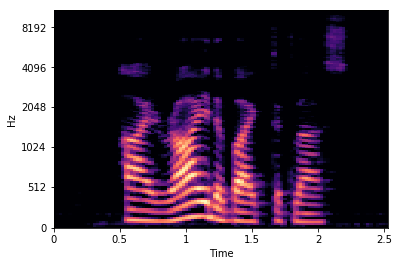

In [74]:
## finding time for spectrogram and audio values
S = librosa.feature.melspectrogram(sr = sr, y = y)
#S, phase = librosa.magphase(librosa.stft(y))
time_duration = librosa.core.samples_to_time(range(0,y.shape[0],), sr = sr)
spec_times = librosa.core.samples_to_time( np.arange(0, y.shape[0], int(y.shape[0]/S.shape[0]) + 1), sr = sr)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), x_axis = "time", y_axis="mel")

In [75]:
time_duration.shape ,S.shape, y.shape, spec_times.shape

((55541,), (128, 109), (55541,), (128,))

In [147]:
### finding IO values form textgrid
interval_tier = tg.getList("stress")[0]
intervals = interval_tier.intervals
i = [interval for interval in intervals if interval.mark=="I"]


True

(51, 128, 2)